## Collinear features and their effect on linear models

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv('task_d.csv')
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [0]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [0]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression


#### Task: 2 Linear SVM


In [0]:
data.corr()['target']

x            0.728290
y           -0.690684
z            0.969990
x*x          0.719570
2*y         -0.690684
2*z+3*x*x    0.764729
w            0.641750
target       1.000000
Name: target, dtype: float64

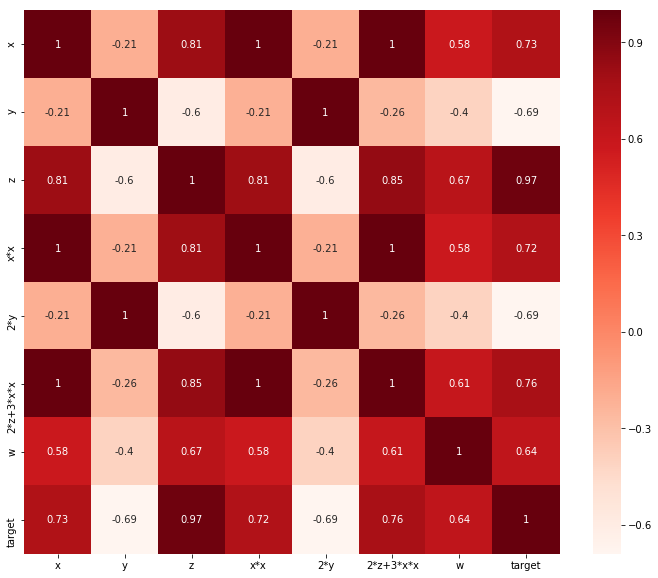

x           -0.205926
y            1.000000
z           -0.602663
x*x         -0.209289
2*y          1.000000
2*z+3*x*x   -0.261123
w           -0.401790
target      -0.690684
Name: y, dtype: float64

In [0]:
plt.figure(figsize=(12,10))

cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()
data.corr()['y']
#Selecting highly correlated features
#relevant_features = cor_target[cor_target>0.5]
#relevant_features

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV

logistic = linear_model.SGDClassifier(loss='log',random_state=15)
hyperparameters = {'alpha':[0.0001,0.001,0.01,1,10,100,1000]}

clf = RandomizedSearchCV(logistic, hyperparameters, random_state=15, n_iter=7, cv=5, verbose=0, n_jobs=-1)
best_alpha=clf .fit(X, Y)
print('Best alpha:',best_alpha.best_estimator_.get_params()['alpha'])

Best alpha: 0.0001


In [0]:

best_model = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
best_model.fit(X, Y)
pred=best_model.predict(X)

correct_pred=0
for i in range(len(X)):
    if pred[i]==Y[i]:
        correct_pred+=1
best_model_accuaracy=correct_pred/len(Y)
W=best_model.coef_
print("\nThe best model accuaracy is",best_model_accuaracy)
print("\nThe best model W is",W)



-- Epoch 1
Norm: 0.01, NNZs: 7, Bias: -0.000001, T: 100, Avg. loss: 0.688359
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 7, Bias: -0.000003, T: 200, Avg. loss: 0.678729
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 7, Bias: -0.000002, T: 300, Avg. loss: 0.669314
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.04, NNZs: 7, Bias: -0.000000, T: 400, Avg. loss: 0.660111
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 7, Bias: 0.000000, T: 500, Avg. loss: 0.651112
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 7, Bias: 0.000001, T: 600, Avg. loss: 0.642314
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.07, NNZs: 7, Bias: -0.000000, T: 700, Avg. loss: 0.633713
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.08, NNZs: 7, Bias: -0.000001, T: 800, Avg. loss: 0.625303
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.08, NNZs: 7, Bias: -0.000002, T: 900, Avg. loss: 0.617081
Total training time: 0.00 sec

In [0]:
X_new=[]

for i in range(len(X)):
    
    X_new.append(X[i]+(100*10**-2))
    

best_model.fit(X_new,Y)
pred_new=best_model.predict(X_new)

correct_pred_new=0
for i in range(len(X_new)):
    if pred_new[i]==Y[i]:
        correct_pred_new+=1
best_model_accuaracy_edited=correct_pred_new/len(Y)
W_new=best_model.coef_
print("\nThe best model accuaracy is",best_model_accuaracy_edited)
print("\nThe best model W is",W_new)

-- Epoch 1
Norm: 0.01, NNZs: 7, Bias: -0.000012, T: 100, Avg. loss: 0.688455
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.02, NNZs: 7, Bias: -0.000056, T: 200, Avg. loss: 0.678889
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.03, NNZs: 7, Bias: -0.000129, T: 300, Avg. loss: 0.669606
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.04, NNZs: 7, Bias: -0.000233, T: 400, Avg. loss: 0.660594
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.05, NNZs: 7, Bias: -0.000361, T: 500, Avg. loss: 0.651843
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.06, NNZs: 7, Bias: -0.000514, T: 600, Avg. loss: 0.643337
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.07, NNZs: 7, Bias: -0.000688, T: 700, Avg. loss: 0.635065
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.07, NNZs: 7, Bias: -0.000888, T: 800, Avg. loss: 0.627022
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.08, NNZs: 7, Bias: -0.001111, T: 900, Avg. loss: 0.619200
Total training time: 0.00 s

In [0]:
accuracy_difference=best_model_accuaracy-best_model_accuaracy_edited
W_difference=abs(W-W_new)

print("\nDifference between 'best_model_accuracy_edited' and 'best_model_accuracy'\n",accuracy_difference)
print("\nAbsolute change between each value of W and W'\n",W_difference)
for i in W[0]:
    percen_change=(abs(W_new -W) /abs(W)) * 100
print("percentage of change in W",percen_change)
print("\nTop 4 features which have higher % change in weights compare to the other feature\n",sorted(percen_change[0], reverse=True)[:4])
n=4
top_2_idx = percen_change.argsort()[::1][:n]

count=1
df=data.drop(['target'],axis=1)

for j in range(len(top_2_idx[0])):
    s=top_2_idx[0][-count]
    print(df.columns[s])
    
    count=count+1
    if count>4:
        break
  
    


Difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
 0.010000000000000009

Absolute change between each value of W and W'
 [[0.0466716  0.08188729 0.05533925 0.04680431 0.08188729 0.04704416
  0.06132371]]
percentage of change in W [[16.93343422 27.31398333 13.39204896 17.35057121 27.31398333 16.07396807
  25.02622539]]

Top 4 features which have higher % change in weights compare to the other feature
 [27.313983327087104, 27.313983327087104, 25.026225394312075, 17.350571214627028]
2*y
y
w
x*x


Observation:
<p>1)features with high % of change in weights  are highly collinear with target
<p>2)The coefficient estimates can swing wildly based on which other independent variables are in the model. The coefficients become very sensitive to small changes in the model.
<p>3)multicollinearity reduces the precision of the estimate coefficients, which weakens the statistical power of model. 

Linear SVM

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV

logistic = linear_model.SGDClassifier(loss='hinge',random_state=15)
hyperparameters = {'alpha':[0.0001,0.001,0.01,1,10,100,1000]}

clf = RandomizedSearchCV(logistic, hyperparameters, random_state=15, n_iter=7, cv=5, verbose=0, n_jobs=-1)
best_alpha=clf .fit(X, Y)
print('Best alpha:',best_alpha.best_estimator_.get_params()['alpha'])

Best alpha: 0.01


In [0]:

best_model = linear_model.SGDClassifier(eta0=0.0001, alpha=0.01, loss='hinge', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
best_model.fit(X, Y)
pred=best_model.predict(X)

correct_pred=0
for i in range(len(X)):
    if pred[i]==Y[i]:
        correct_pred+=1
best_model_accuaracy=correct_pred/len(Y)
W=best_model.coef_
print("\nThe best model accuaracy is",best_model_accuaracy)
print("\nThe best model W is",W)


-- Epoch 1
Norm: 0.02, NNZs: 7, Bias: -0.000000, T: 100, Avg. loss: 0.980702
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 7, Bias: -0.000000, T: 200, Avg. loss: 0.941307
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 7, Bias: 0.000000, T: 300, Avg. loss: 0.901917
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.08, NNZs: 7, Bias: 0.000000, T: 400, Avg. loss: 0.862531
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.10, NNZs: 7, Bias: 0.000000, T: 500, Avg. loss: 0.823148
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.12, NNZs: 7, Bias: -0.000000, T: 600, Avg. loss: 0.783770
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.14, NNZs: 7, Bias: -0.000000, T: 700, Avg. loss: 0.744395
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.16, NNZs: 7, Bias: -0.000000, T: 800, Avg. loss: 0.705024
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.18, NNZs: 7, Bias: -0.000000, T: 900, Avg. loss: 0.665658
Total training time: 0.00 seco

In [0]:
X_new=[]
for i in range(len(X)):
    X_new.append(X[i]+(100*10**-2))
    
best_model.fit(X_new,Y)
pred_new=best_model.predict(X_new)

correct_pred_new=0
for i in range(len(X_new)):
    if pred_new[i]==Y[i]:
        correct_pred_new+=1
best_model_accuaracy_edited=correct_pred_new/len(Y)
W_new=best_model.coef_
print("\nThe best model accuaracy is",best_model_accuaracy_edited)
print("\nThe best model W is",W_new)

-- Epoch 1
Norm: 0.02, NNZs: 7, Bias: -0.000000, T: 100, Avg. loss: 0.981052
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.04, NNZs: 7, Bias: -0.000000, T: 200, Avg. loss: 0.941657
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.06, NNZs: 7, Bias: 0.000000, T: 300, Avg. loss: 0.902267
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.08, NNZs: 7, Bias: 0.000000, T: 400, Avg. loss: 0.862880
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.10, NNZs: 7, Bias: 0.000000, T: 500, Avg. loss: 0.823498
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.12, NNZs: 7, Bias: -0.000000, T: 600, Avg. loss: 0.784120
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.14, NNZs: 7, Bias: -0.000000, T: 700, Avg. loss: 0.744746
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.16, NNZs: 7, Bias: -0.000000, T: 800, Avg. loss: 0.705375
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.18, NNZs: 7, Bias: -0.000000, T: 900, Avg. loss: 0.666008
Total training time: 0.00 seco

In [0]:
accuracy_difference=best_model_accuaracy-best_model_accuaracy_edited
W_difference=abs(W-W_new)

print("\nDifference between 'best_model_accuracy_edited' and 'best_model_accuracy'\n",accuracy_difference)
print("\nAbsolute change between each value of W and W'\n",W_difference)
for i in W[0]:
    percen_change=(abs(W_new -W) /abs(W)) * 100
print("percentage of change in W",percen_change)
print("\nTop 4 features which have higher % change in weights compare to the other feature\n",sorted(percen_change[0], reverse=True)[:4])
top_2_idx = percen_change.argsort()[::1][:n]

count=1
df=data.drop(['target'],axis=1)

for j in range(len(top_2_idx[0])):
    s=top_2_idx[0][-count]
    print(df.columns[s])
    
    count=count+1
    if count>4:
        break
    


Difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
 0.010000000000000009

Absolute change between each value of W and W'
 [[0.03215284 0.09206148 0.05306726 0.0342324  0.09206148 0.03486334
  0.05364267]]
percentage of change in W [[15.24314811 34.0465799  14.06307677 16.82087477 34.0465799  15.24276233
  28.44818387]]

Top 4 features which have higher % change in weights compare to the other feature
 [34.04657989590809, 34.04657989590809, 28.448183873617673, 16.820874772856122]
2*y
y
w
x*x


Observation:
features with high % of change in weights  are highly collinear with target